<a href="https://colab.research.google.com/github/SmitM1/GradeGain-Forecasting-Student-Performance-with-Linear-Regression/blob/main/Student_performance_predicter_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


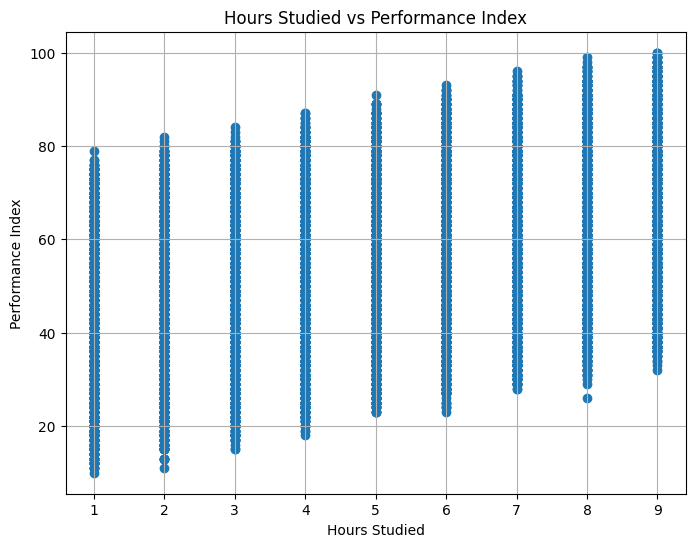

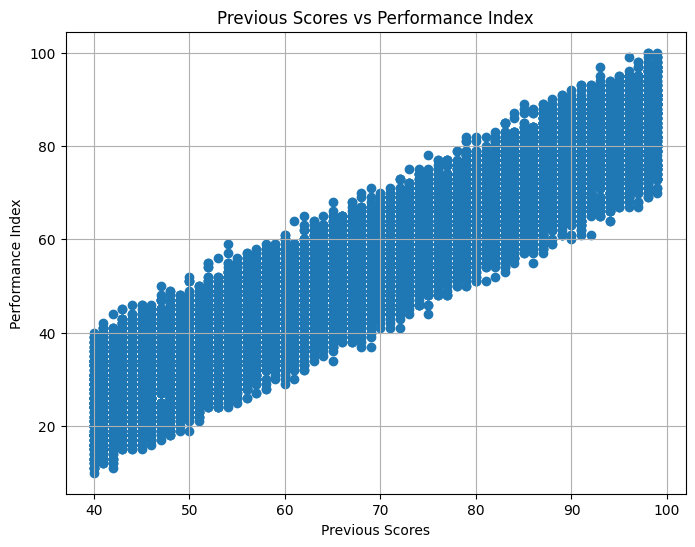

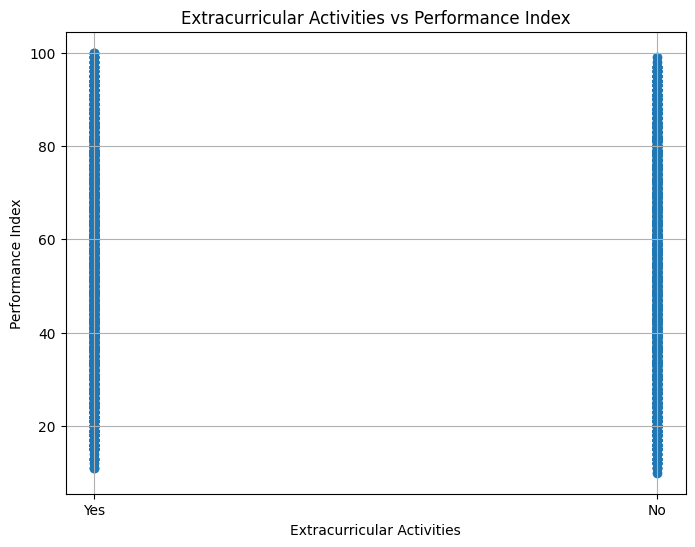

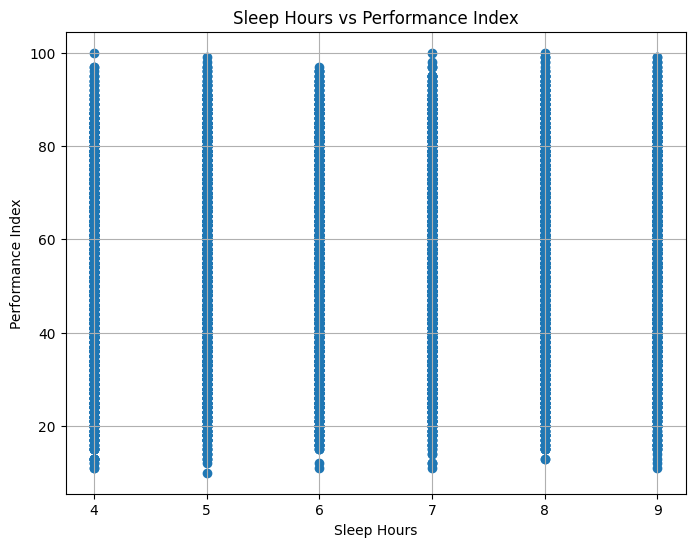

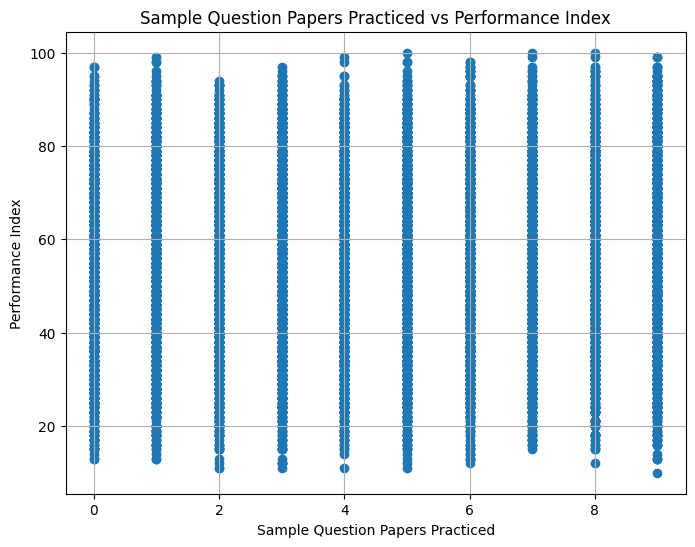

In [ ]:
# Create scatter plots for each column against the Performance Index
columns_to_plot = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.scatter(df[column], df['Performance Index'])
    plt.xlabel(column)
    plt.ylabel('Performance Index')
    plt.title(f'{column} vs Performance Index')
    plt.grid(True)
    plt.show()

# Show the plot
plt.show()

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
y = df['Performance Index']
X = df.drop(['Performance Index'], axis = 1)

In [ ]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [ ]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [ ]:
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [ ]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
columns = X.columns

In [ ]:
columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns = columns)

In [ ]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333
...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982
9996,0.775188,-0.314013,1.010455,0.866505,0.145333
9997,0.388965,0.781575,1.010455,0.866505,0.145333
9998,1.547633,1.588851,1.010455,0.276805,-1.598526


In [ ]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [ ]:
train_X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4427,-0.769703,-0.890638,1.010455,0.276805,0.494105
9143,-1.155926,1.012225,-0.989654,1.456205,0.145333
1573,-1.542149,-1.121288,1.010455,-0.312895,1.191649
707,0.775188,-1.063626,1.010455,0.866505,0.145333
5050,0.388965,-0.025700,-0.989654,-0.902594,0.145333
...,...,...,...,...,...
544,1.161410,0.781575,-0.989654,0.276805,-0.203439
2345,-0.769703,-1.236613,1.010455,0.276805,0.842877
7564,1.547633,0.781575,1.010455,-0.312895,0.145333
1643,1.161410,-0.948301,-0.989654,0.276805,0.145333


In [ ]:
test_X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6049,1.547633,-0.717651,-0.989654,-0.312895,-1.598526
9518,1.161410,1.300538,1.010455,0.276805,0.842877
9288,0.775188,0.550925,-0.989654,-0.902594,1.540420
5692,0.002742,-0.832976,1.010455,0.276805,-1.598526
4272,0.002742,0.377938,-0.989654,-1.492294,1.191649
...,...,...,...,...,...
3468,0.775188,1.069888,1.010455,-0.312895,-1.598526
606,-1.155926,0.031962,-0.989654,-0.312895,-0.203439
5723,-1.155926,1.069888,-0.989654,0.866505,0.494105
593,0.002742,-0.717651,1.010455,-0.902594,-0.900982


In [ ]:
train_y

4427    34.0
9143    67.0
1573    23.0
707     41.0
5050    56.0
        ... 
544     77.0
2345    27.0
7564    81.0
1643    45.0
1247    26.0
Name: Performance Index, Length: 8000, dtype: float64

In [ ]:
test_y

6049    53.0
9518    89.0
9288    71.0
5692    42.0
4272    61.0
        ... 
3468    77.0
606     45.0
5723    65.0
593     41.0
5535    45.0
Name: Performance Index, Length: 2000, dtype: float64

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(train_X, train_y)

LinearRegression()

In [ ]:
predictions = lr.predict(test_X)

In [ ]:
predictions.shape

(2000,)

In [ ]:
train_predictions = lr.predict(train_X)

In [ ]:
train_mse = mean_squared_error(train_y, train_predictions)

In [ ]:
train_mse

4.181584187361258

In [ ]:
test_mse = mean_squared_error(test_y, predictions)

In [ ]:
test_mse

4.032221235663806

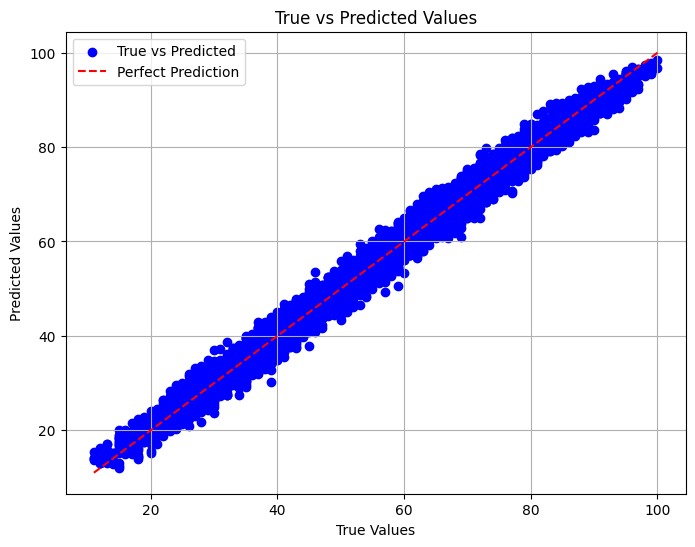

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_y, train_predictions, c='blue', label='True vs Predicted')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

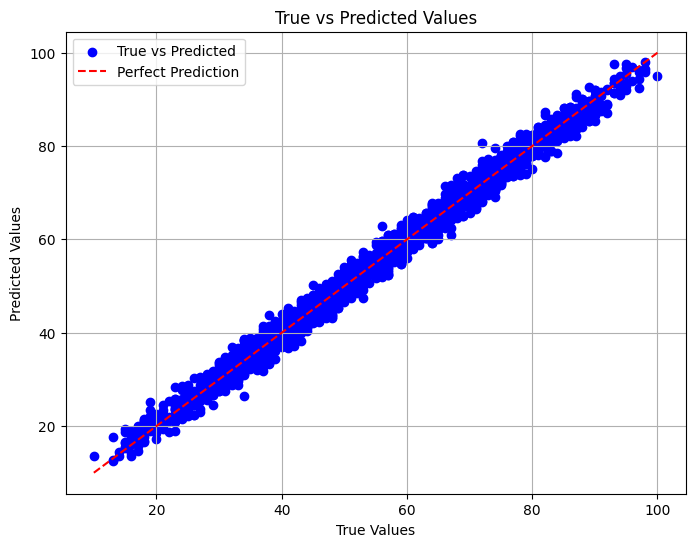

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, c='blue', label='True vs Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4427,-0.769703,-0.890638,1.010455,0.276805,0.494105
9143,-1.155926,1.012225,-0.989654,1.456205,0.145333
1573,-1.542149,-1.121288,1.010455,-0.312895,1.191649
707,0.775188,-1.063626,1.010455,0.866505,0.145333
5050,0.388965,-0.025700,-0.989654,-0.902594,0.145333


In [ ]:
first = train_X.loc[0]
first.shape

(5,)

In [ ]:
inputlist = [[7, 80, 1, 4, 3]]

In [ ]:
inputlist = scaler.transform(inputlist)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
inputlist

array([[ 0.77518771,  0.60858762,  1.01045465, -1.49229423, -0.55221037]])

In [ ]:
inputlist.shape

(1, 5)

In [ ]:
inputlist = inputlist.reshape(1, -1)

In [ ]:
predict = lr.predict(inputlist)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predict

array([70.49638372])